In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
path= r"C:\Users\USER\Downloads\titanic_train.csv"
df=pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 주제 >> 성별과 나이에 따라 구조 우선 순위(생존률)가 달라질까?

귀립가설 >> 성별과 나이에 따라 생존률에는 차이가 없다.

대립가설 >> 성별과 나이에 따라 생존률에 차이가 있다.

In [14]:
# // 결측치 확인
df['Age'].isna().sum()

# // 117개 확인

# // 결측치 제거
df=df.dropna(subset=['Age'])

df['Age'].isna().sum()


np.int64(0)

In [15]:
# // 나이 그룹 나누기

# // 만 18세 기준
df['AgeGroup']=df['Age'].apply(lambda x: 'Child' if x<18 else 'Adult')


In [16]:
# // 성별과 나이 그룹 만들기
df['group']=df['Sex']+'_'+df['AgeGroup']
df['group'].head()


0      male_Adult
1    female_Adult
2    female_Adult
3    female_Adult
4      male_Adult
Name: group, dtype: object

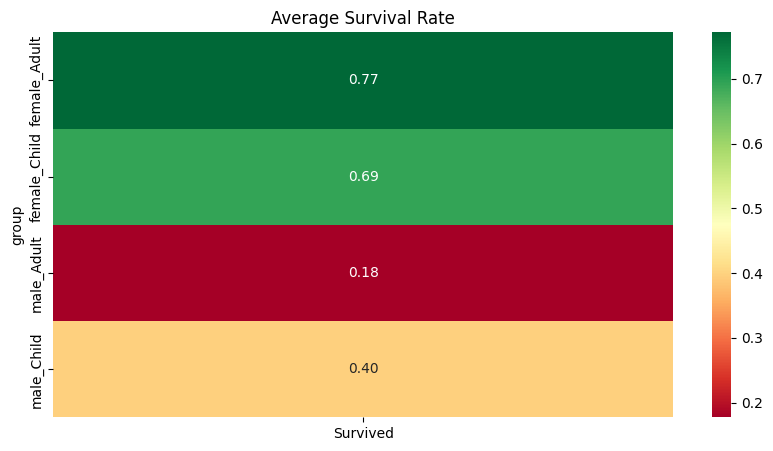

In [17]:
# // 'group'과 생존율'Survived'의 평균 pivot-table 생성

pivot_table=df.pivot_table(values='Survived',index='group',aggfunc='mean')
pivot_table

# // 시각화
plt.figure(figsize=(10,5))
sns.heatmap(pivot_table,annot=True,cmap='RdYlGn',fmt='.2f')
plt.title("Average Survival Rate")
plt.show()


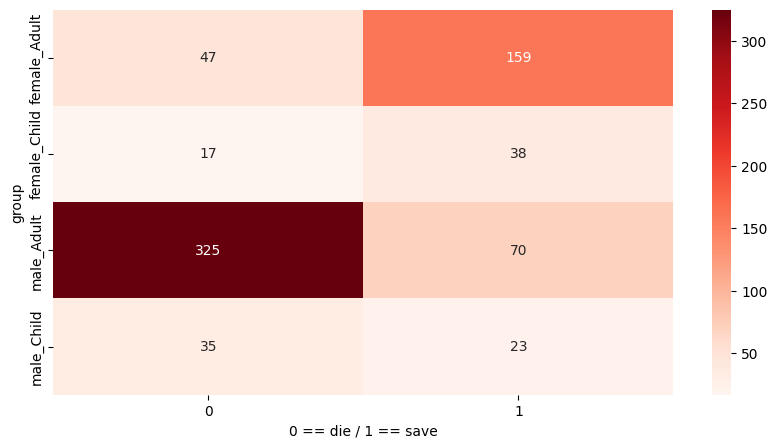

In [18]:
# // 'group'과 생존율'Survived'의 교차표 생성

contingency_table=pd.crosstab(df['group'],df['Survived'])
contingency_table

# // 시각화
plt.figure(figsize=(10,5))
sns.heatmap(contingency_table,annot=True,cmap='Reds',fmt='.0f')
plt.xlabel("0 == die / 1 == save")
plt.show()

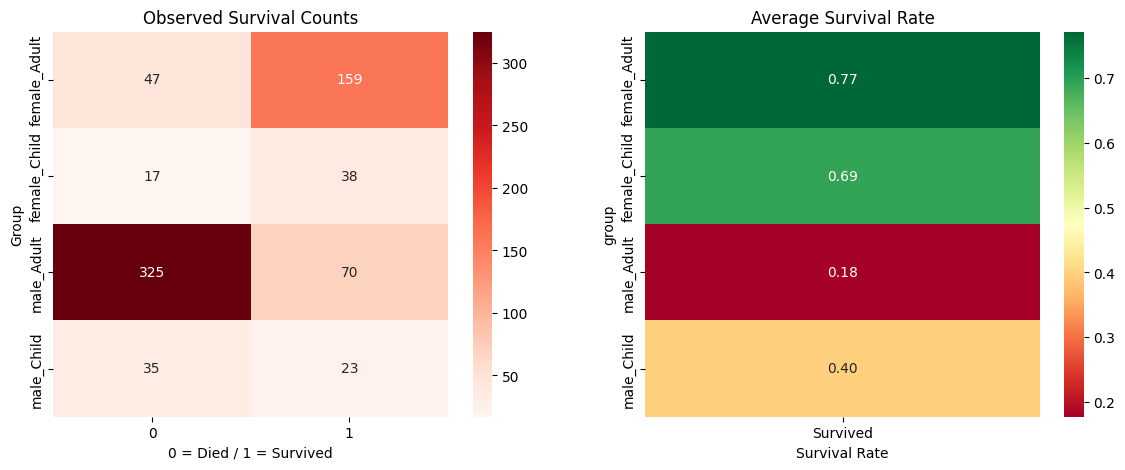

In [21]:
contingency_table = pd.crosstab(df['group'], df['Survived'])
pivot_table = df.pivot_table(values='Survived', index='group', aggfunc='mean')

# // 시각화
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='.0f')
plt.title("Observed Survival Counts")
plt.xlabel("0 = Died / 1 = Survived")
plt.ylabel("Group")

plt.subplot(1, 2, 2)
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', fmt='.2f')
plt.title("Average Survival Rate")
plt.xlabel("Survival Rate")

plt.show()

In [20]:
# // 독립 검정 시작
chi2, p, dof, expected= stats.chi2_contingency(contingency_table)

alpha=0.05

if p <alpha:
    print("귀무가설 기각. 성별과 나이에 따라 생존률은 유의미하게 다름.")
else:
    print("귀무가설 채택. 성별과 나이에 따라 생존률은 유의미하지 않음.")


귀무가설 기각. 성별과 나이에 따라 생존률은 유의미하게 다름.
